<a href="https://colab.research.google.com/github/PranayUmredkar97/Bank-Marketing-Effectiveness-Prediction-Classification-Capstone-Project-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## **Import Packages**

In [1]:
#import required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#set style for graph
sns.set_style(style='darkgrid')

#set max columns display limit
pd.set_option("display.max_columns",None)

# Setting fontsizes,fontweight,label weight for labels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

## **Data Preparation**

## **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#CSV file location
path = '/content/drive/MyDrive/Bank Marketing Effectiveness Prediction - Pranay Umredkar/bank-full.csv'

## **Reading Data in notebook**

In [5]:
df = pd.read_csv(path,delimiter=';')

## **Data Inspection**

In [6]:
#first look checking top 5 rows of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#check bottom 5 rows of data
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
#check the informaation about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#check discriptive statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
#check column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [11]:
#First create copy of dataset before working with it
df1 = df.copy()

## **Check columns and their unique values to understand what they contain**

In [27]:
#check unique values in categorical columns
categorical_columns = df1.select_dtypes(include=['object'])
for col in categorical_columns:
  print(f'Unique values in categorical columns {col} are: {categorical_columns[col].unique()} and number of categories are {len(categorical_columns[col].unique())} \n')

Unique values in categorical columns job are: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] and number of categories are 12 

Unique values in categorical columns marital are: ['married' 'single' 'divorced'] and number of categories are 3 

Unique values in categorical columns education are: ['tertiary' 'secondary' 'unknown' 'primary'] and number of categories are 4 

Unique values in categorical columns default are: ['no' 'yes'] and number of categories are 2 

Unique values in categorical columns housing are: ['yes' 'no'] and number of categories are 2 

Unique values in categorical columns loan are: ['no' 'yes'] and number of categories are 2 

Unique values in categorical columns contact are: ['unknown' 'cellular' 'telephone'] and number of categories are 3 

Unique values in categorical columns month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

In [24]:
#check unique values in numerical columns
numerical_columns = df1._get_numeric_data()
for col in numerical_columns:
  print(f'Unique values in numerical columns {col} are: {numerical_columns[col].unique()[:8]}\n')

Unique values in numerical columns age are: [58 44 33 47 35 28 42 43]

Unique values in numerical columns balance are: [2143   29    2 1506    1  231  447  121]

Unique values in numerical columns day are: [ 5  6  7  8  9 12 13 14]

Unique values in numerical columns duration are: [261 151  76  92 198 139 217 380]

Unique values in numerical columns campaign are: [1 2 3 5 4 6 7 8]

Unique values in numerical columns pdays are: [ -1 151 166  91  86 143 147  89]

Unique values in numerical columns previous are: [ 0  3  1  4  2 11 16  6]



## **Handling missing values**

In [14]:
#check null values
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there are no null values in our dataset.

In [15]:
#check for duplicate rows
df1.duplicated().value_counts()

False    45211
dtype: int64

As we can see there are no duplicate row in our dataset.

## **EDA**

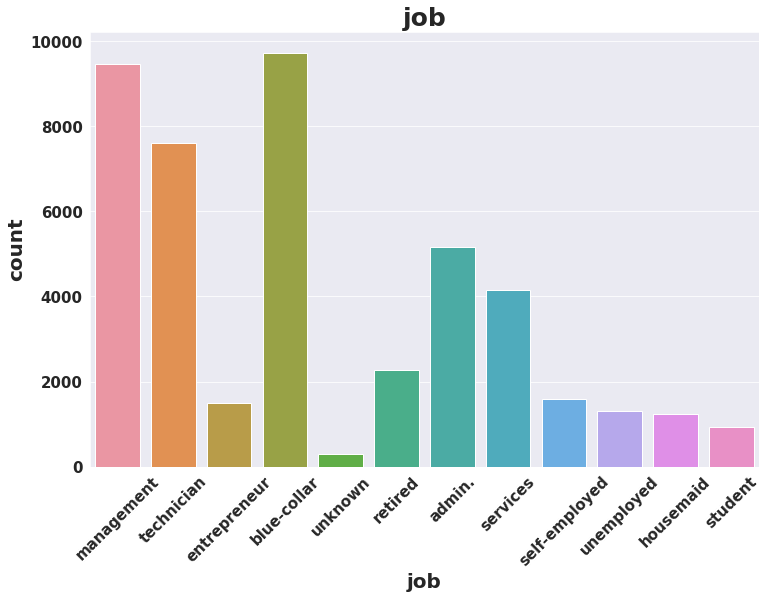

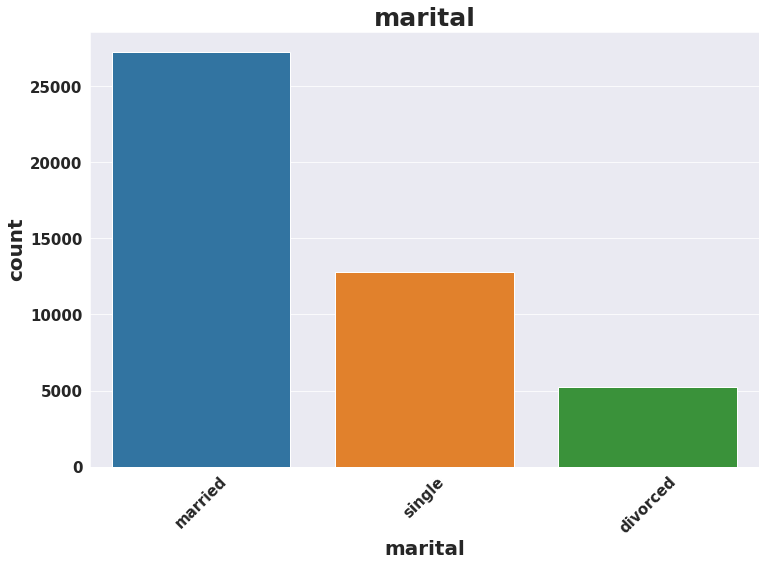

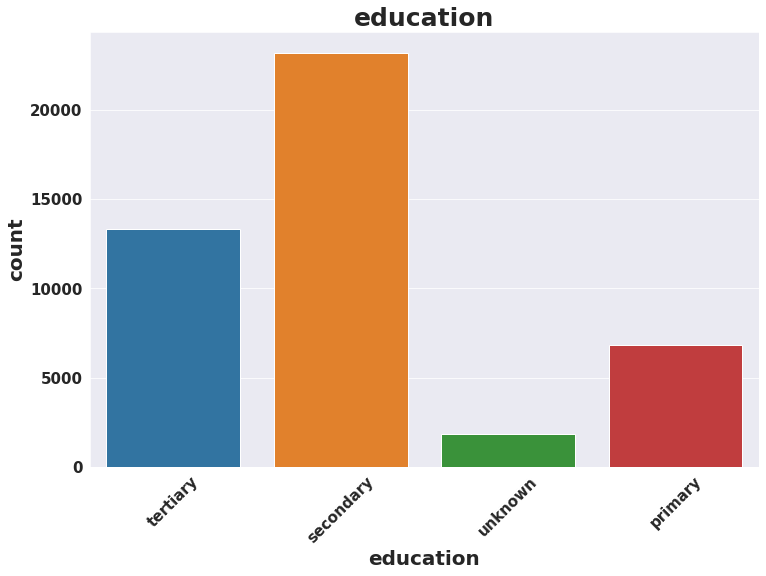

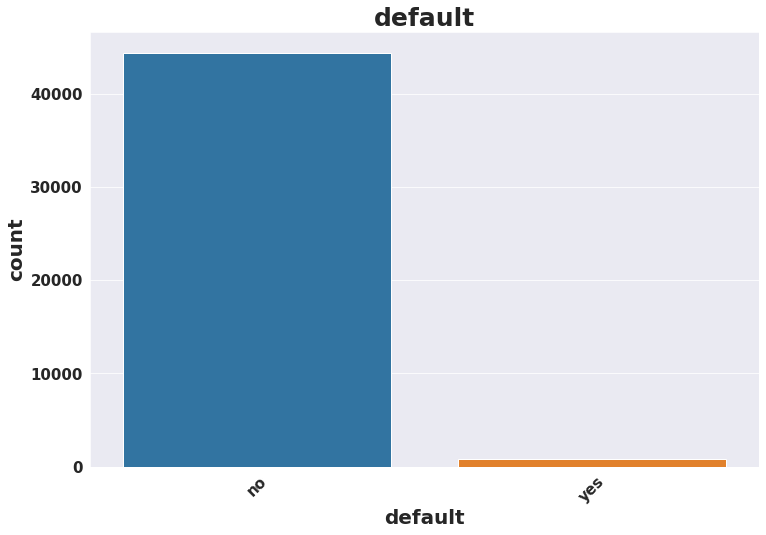

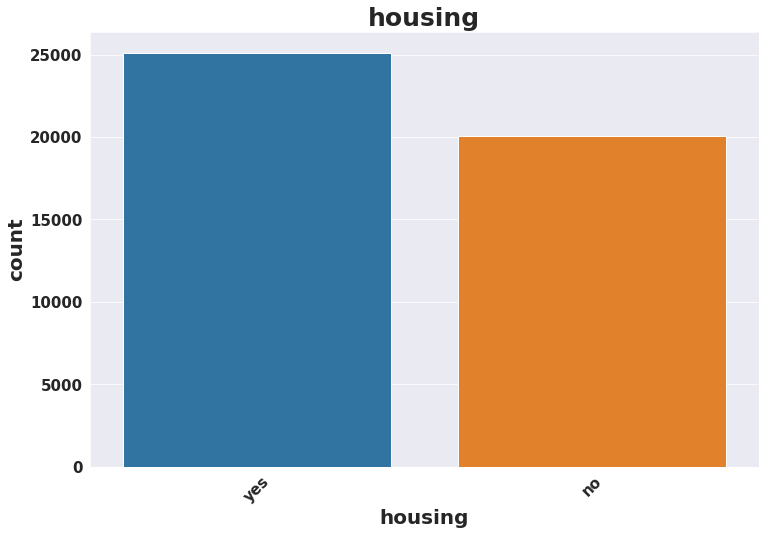

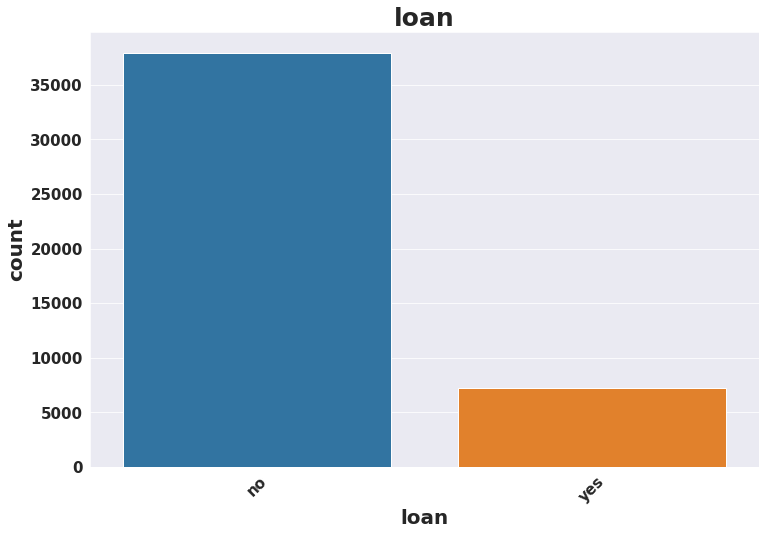

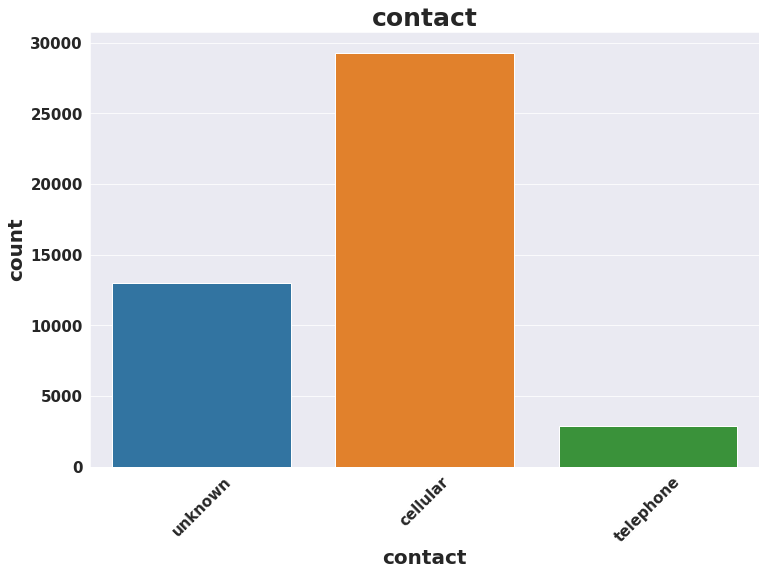

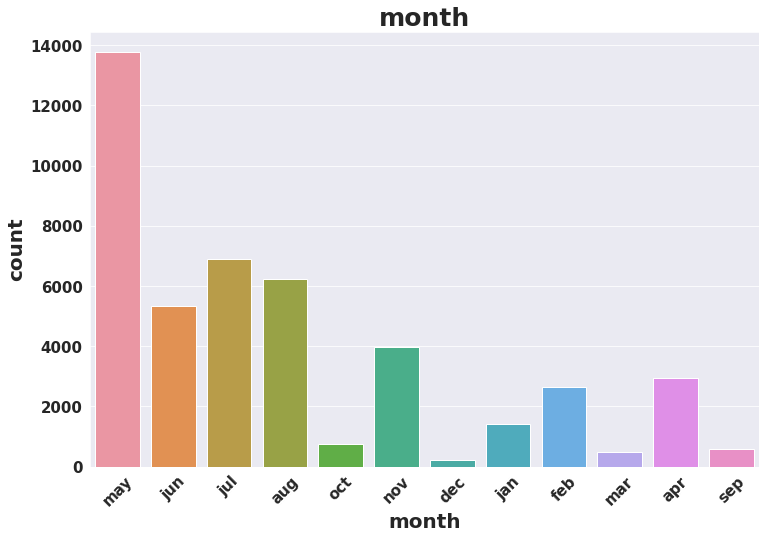

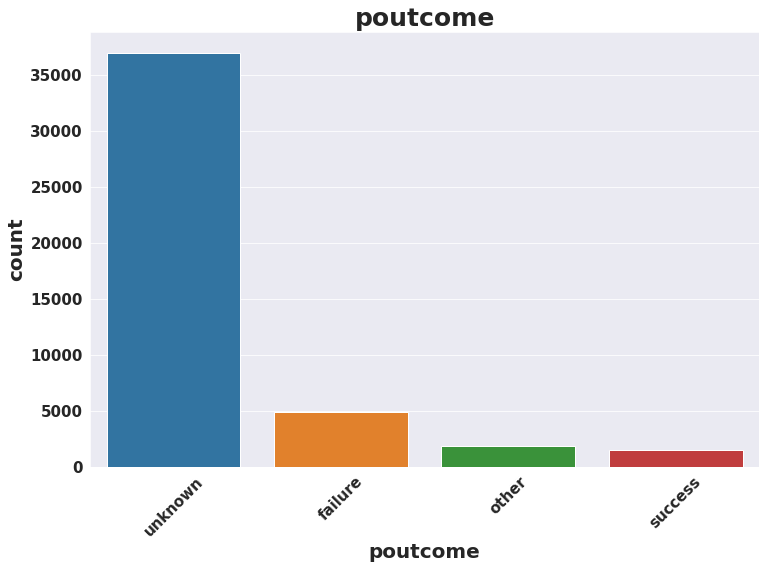

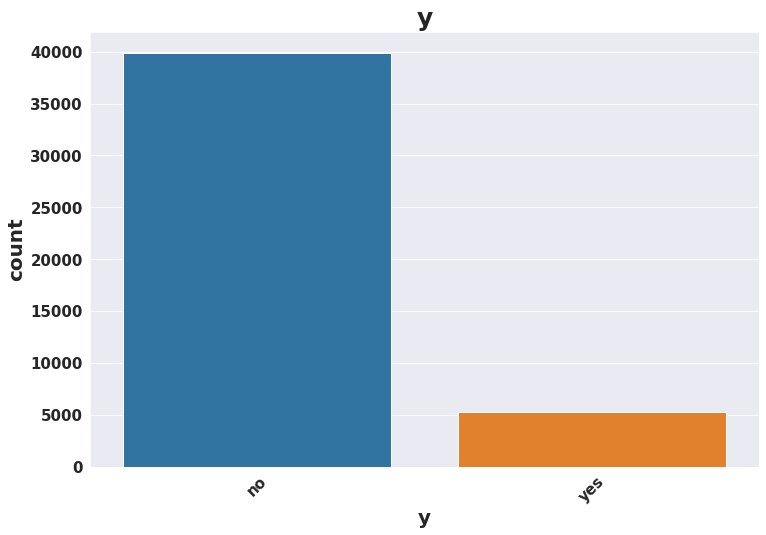

In [39]:
#checking count of each categorical features

#running for loop to plot every category counts,setting figure size,title,xlabel and title
for category in categorical_columns:
  plt.figure(figsize=(12,8))
  sns.countplot(category,data=df1)
  plt.xlabel(category)
  plt.xticks(rotation=45)
  plt.title(category)



### **Inference**


*   Management and blue collor has the highest distribution and unknown has the lowest.
*   We have maximum data of married people.
*  Secondary and tertiory education background clients are highest in the dataset.
* Client who has no credit in default is maximum and who has is very low near to 1 %.
* Client with no personal loan are more in dataset.
* Previous outcome is unknown in maximum cases  might be the because there was no proper reason given for the same.
* We have maximum data available for the month of may,june,july and august.
* Y whiich is our target variable we can see there are more no results than yes. As it is classification problem and we have class imbalance which is the problem we have to solve this class imbalance before training model.



In [44]:
#now let's check relation between cat feature and outcome variable but first we have to drop our outcome variable from categorical columns
cat_features= categorical_columns.drop('y',axis=1)

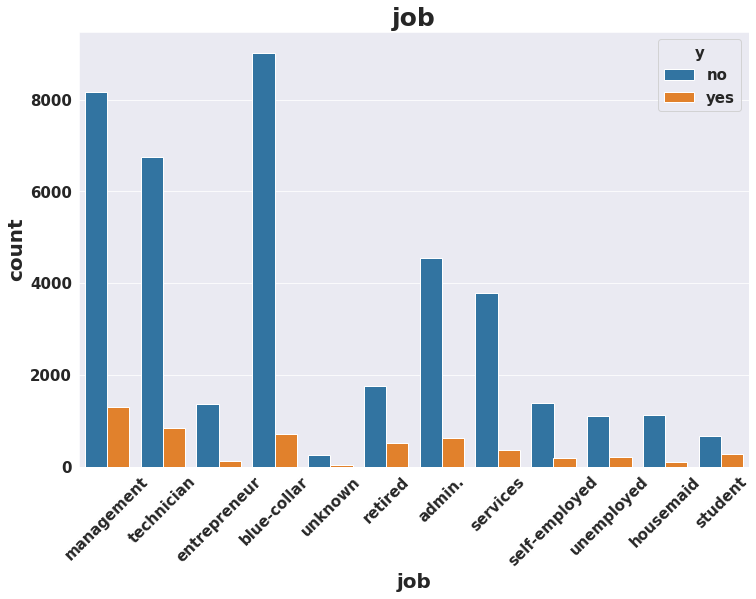

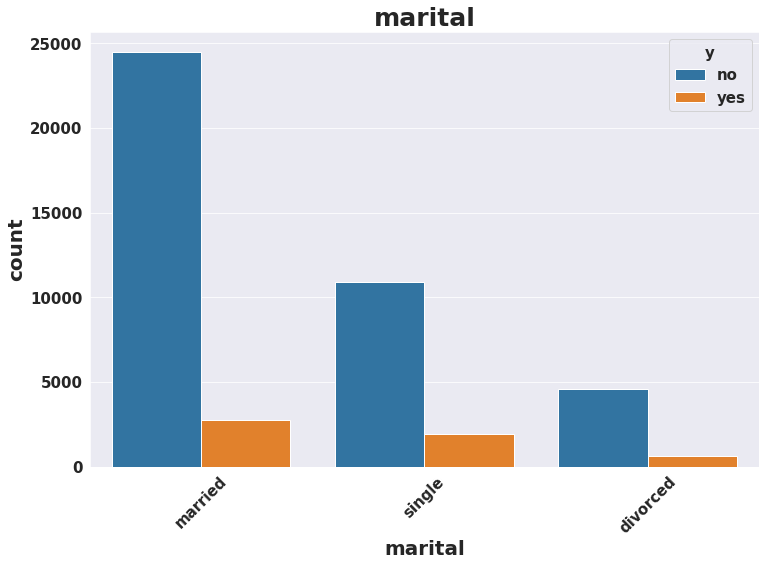

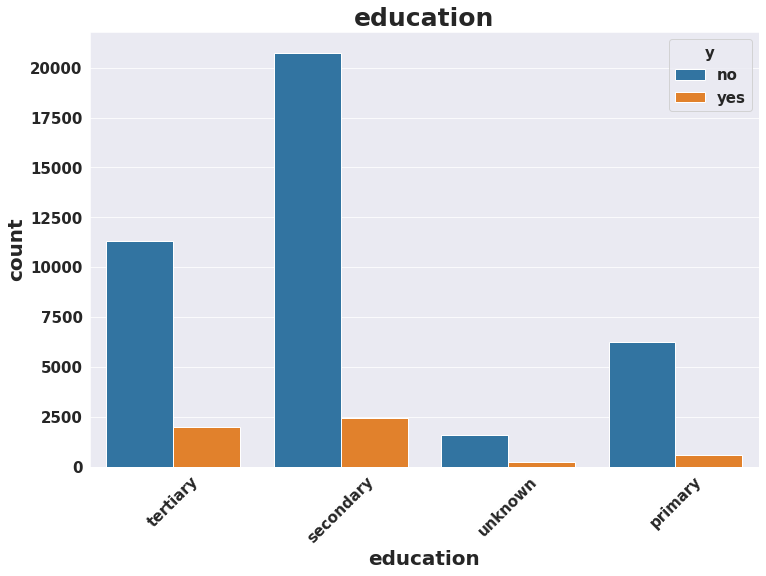

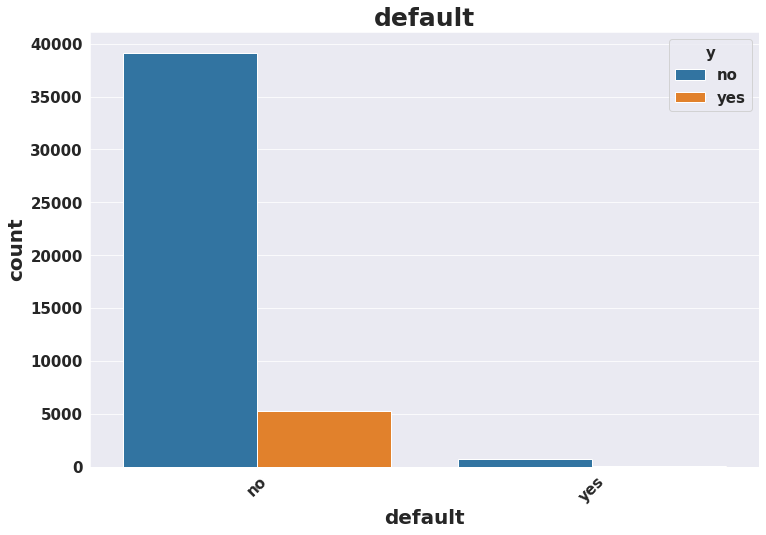

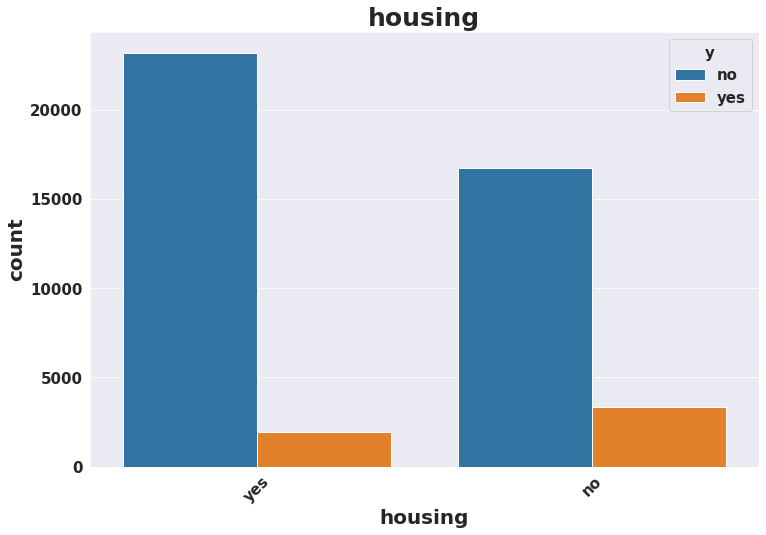

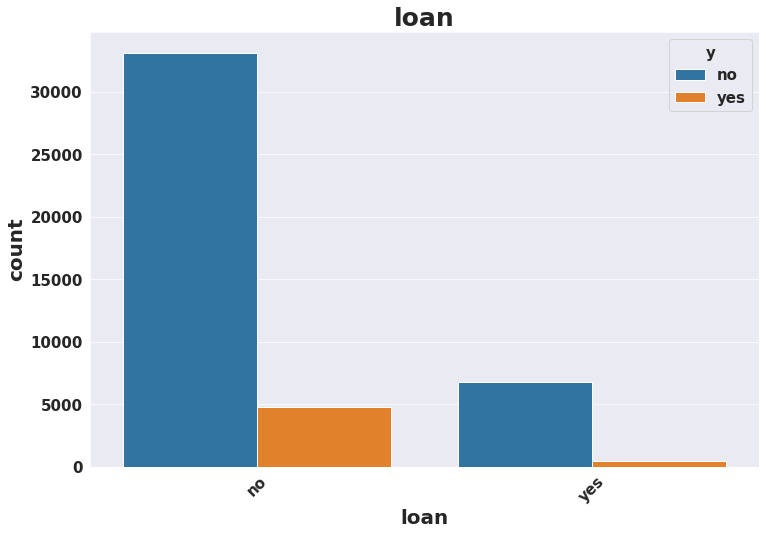

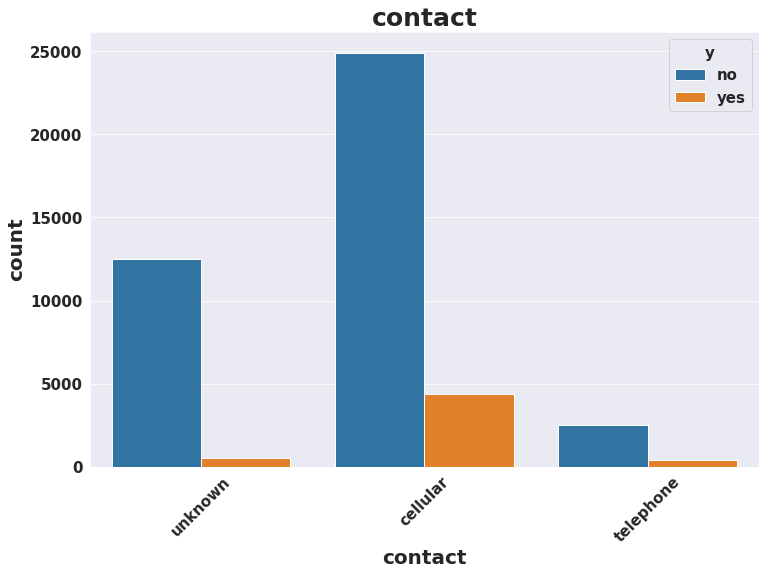

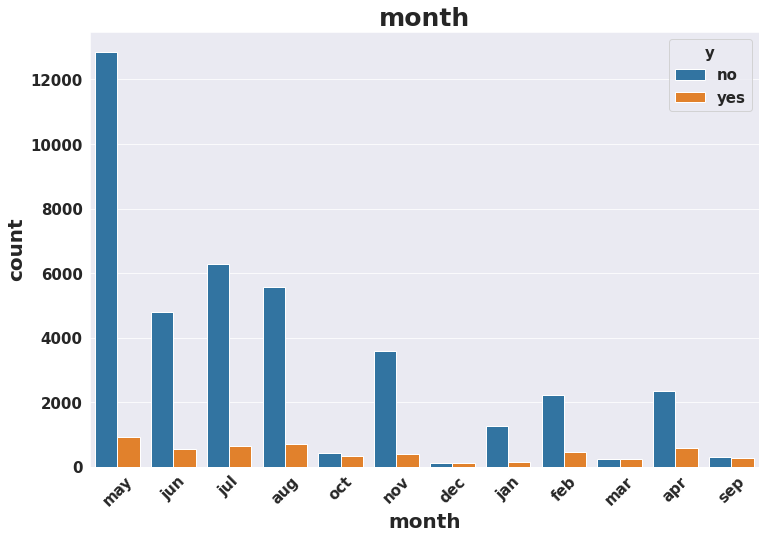

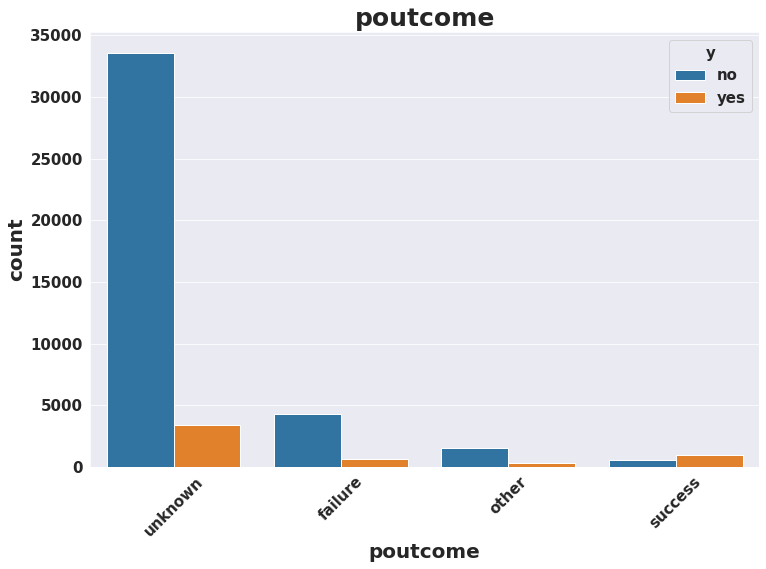

In [53]:
#creating for loop to plot realtion between categorical features and outcome
for cat in cat_features:
  plt.figure(figsize=(12,8))
  sns.countplot(cat,hue='y',data=df1)
  plt.xlabel(cat)
  plt.xticks(rotation=45)
  plt.title(cat)